# QPM : Assignement 2

## Librairies

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, kstest, norm
import matplotlib.pyplot as plt
import yfinance as yf

## Functions

In [2]:
'''
Returns the full time series of price metrics (Open, High, Low, Close, Adj Close, Volume, etc.)
for a list of given stock tickers, over a specified time period and interval.

Inputs:
    - list_underlying: list of str ; tickers of the desired stocks.
    - period_value: str ; total time span to retrieve (e.g., "1y", "5y", "max").
    - interval_value: str ; frequency of data points (e.g., "1d", "1wk", "1mo").

Output:
    - DataFrame with:
        - index: pandas Timestamps (dates in ascending order),
        - columns: MultiIndex with first level = metrics (e.g., "Close"), 
                   second level = stock tickers.
'''
def get_multi_timeseries(list_underlyings, period_value, interval_value) :
    underlyings_object = yf.Tickers(list_underlyings)
    underlyings_data = underlyings_object.history(period = period_value, interval = interval_value)
    return underlyings_data

In [3]:
'''
functions returning the moments of each time series in a dataframe.
Input: df_return: DataFrame ; Time series of each stocks for a given metric
Output: DataFrame ; index: Tickers ; Column: Moments value.
'''

def first_moment(df_return) :
    df_return_mean = df_return.mean(axis = 0)
    return df_return_mean.to_frame(name = "First Moment")

def second_moment(df_return) : 
    df_return_var = df_return.var(axis = 0) 
    return df_return_var.to_frame(name = "Second Moment")

def covariance(df_return) : 
    return df_return.cov()

## Questions for Assignment 2

#### Q2.1 Download daily stock prices for FAANG stocks (Facebook/Meta, Amazon, Apple, Netfix, Google/Alphabet) from January 2015 until December 2020. Note that the ticker symbols for the 5 stocks are: META, AMZN, AAPL, NFLX, and GOOG.

In [4]:
'''
Assign a value to each parameter
'''

list_stocks = ["META","AMZN","AAPL","NFLX","GOOG"]
period_value = "max"
interval_value = "1d"
raw_market_data = get_multi_timeseries(list_stocks, period_value, interval_value)
close_price_data = raw_market_data.xs("Close",axis = 1) #We create a DataFrame containing only the Close Price metric of the stocks
close_price_focus = close_price_data.loc["2015-01-01":"2020-12-01"] #We select the time period we are interested in.

[*********************100%***********************]  5 of 5 completed


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

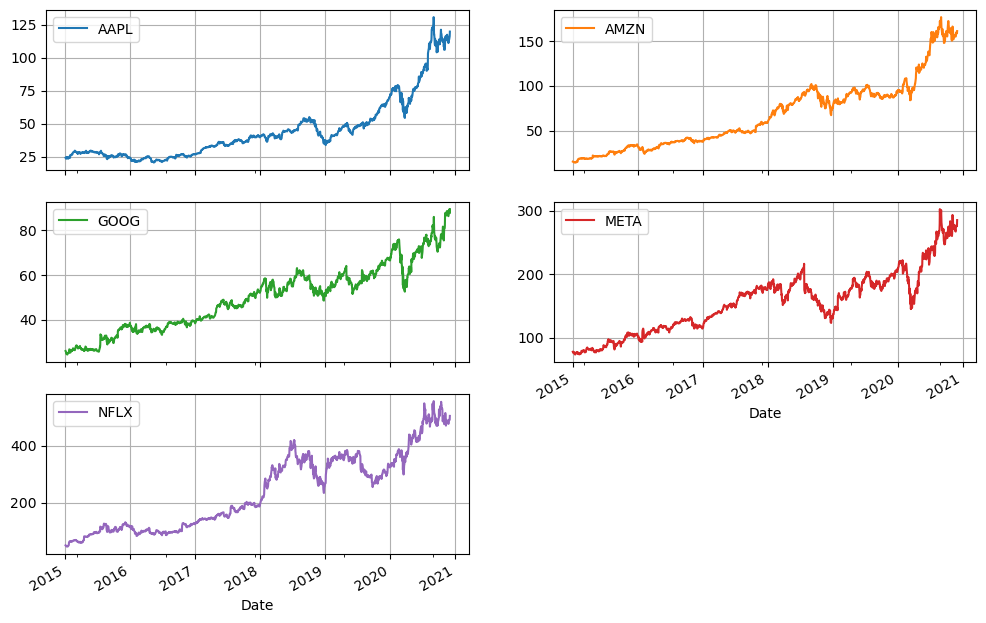

In [6]:
'''
Graphic representation of the close price time serie for each stock.
'''
close_price_focus.plot(subplots = True, layout = (3,2), figsize = (12,8), grid = True)

#### Q2.2 Compute the first and second moments of stock returns for each of these stocks (i.e., their means, variances, and covariances).

In [7]:
'''
Create a DataFrame containing the returns for each stocks
'''
returns_data = close_price_focus.pct_change().dropna()

In [8]:
'''
Compute the moments for the stocks returns
'''
mean_returns_data = first_moment(returns_data)
var_returns_data = second_moment(returns_data)
covariance_data = covariance(returns_data)

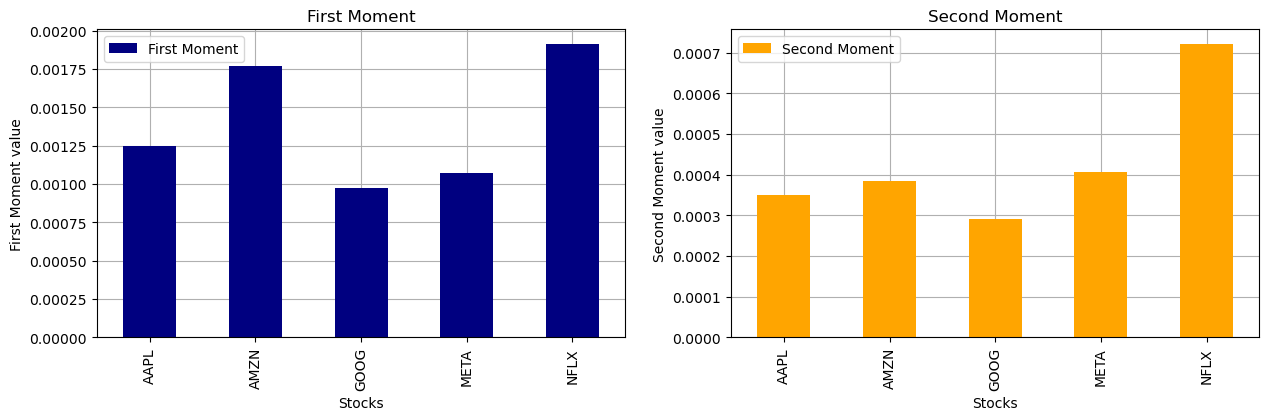

In [9]:
'''
Graphical comparison of the stocks moments
'''

#Bar Plot
fig, ax = plt.subplots(1, 2, figsize=(15,4))
#First Moment
mean_returns_data.plot(kind='bar', ax = ax[0], color = "navy")
ax[0].set_title("First Moment")
ax[0].set_xlabel("Stocks")
ax[0].set_ylabel("First Moment value")
ax[0].grid()
ax[0].set_axisbelow(True)
#Second Moment
var_returns_data.plot(kind='bar', ax = ax[1], color = "orange")
ax[1].set_title("Second Moment")
ax[1].set_xlabel("Stocks")
ax[1].set_ylabel("Second Moment value")
ax[1].grid()
ax[1].set_axisbelow(True)

In [10]:
covariance_data.style.background_gradient(cmap='RdYlGn')

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,0.000349,0.000203,0.000194,0.000218,0.000208
AMZN,0.000203,0.000384,0.000218,0.000237,0.000277
GOOG,0.000194,0.000218,0.000290,0.000230,0.000219
META,0.000218,0.000237,0.000230,0.000406,0.000240
NFLX,0.000208,0.000277,0.000219,0.000240,0.000721


#### Q2.3 Compute the skewness and excess kurtosis for the returns for each of these stocks. Do the daily stock returns have a Normal distribution?

In [11]:
# Compute skewness
skewness_array = skew(returns_data)
skewness_data = pd.DataFrame(skewness_array, columns = ["Skewness"], index = returns_data.columns)
# Compute excess kurtosis
excess_kurtosis_array = kurtosis(returns_data, fisher=True)
excess_kurtosis_data = pd.DataFrame(excess_kurtosis_array, columns = ["Excess Kurtosis"], index = returns_data.columns)

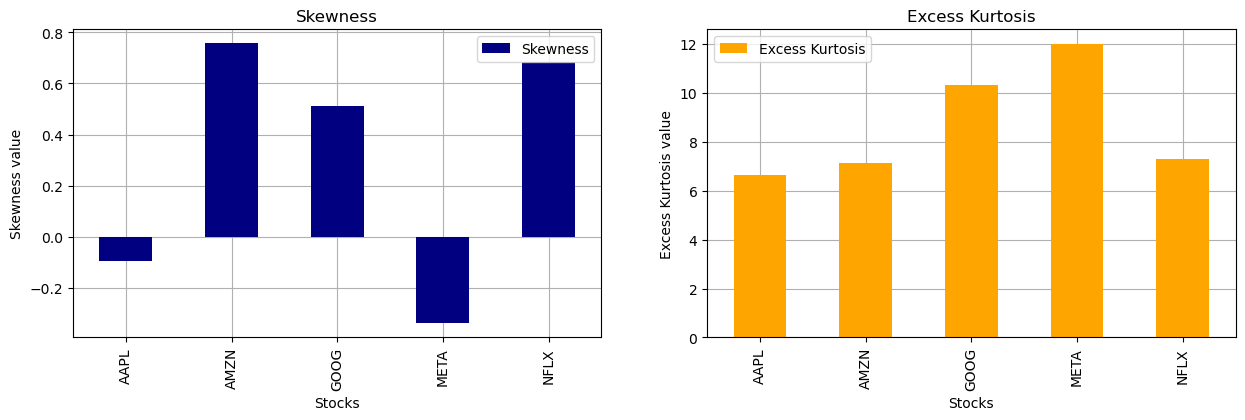

In [12]:
#Bar Plot
fig, ax = plt.subplots(1, 2, figsize=(15,4))
#Skewness
skewness_data.plot(kind='bar', ax = ax[0], color = "navy")
ax[0].set_title("Skewness")
ax[0].set_xlabel("Stocks")
ax[0].set_ylabel("Skewness value")
ax[0].grid()
ax[0].set_axisbelow(True)
#Excess Kurtosis
excess_kurtosis_data.plot(kind='bar', ax = ax[1], color = "orange")
ax[1].set_title("Excess Kurtosis")
ax[1].set_xlabel("Stocks")
ax[1].set_ylabel("Excess Kurtosis value")
ax[1].grid()
ax[1].set_axisbelow(True)

It looks like the Daily stocks returns do not have a Normal Distribution as the Skewness != 0 and Excess Kurtosis != 0.

In [13]:
'''
p-value for the Kolmogorov-Smirnov test on the daily returns
'''
for i in returns_data.columns :
    print('KS_test on ',i,' returns : =',kstest(returns_data[i].values, norm.cdf).pvalue)

KS_test on  AAPL  returns : = 5.889955850802141e-302
KS_test on  AMZN  returns : = 7.403503462054809e-305
KS_test on  GOOG  returns : = 6.081786266481234e-308
KS_test on  META  returns : = 6.510201783315536e-302
KS_test on  NFLX  returns : = 9.048747302381185e-293


Using the Koklmogorov-Smirnov test we can reject the Normal distribution of the daily returns hypothesis.
All tickers returns have a p_value inferior to 10**(-200) for the goodness of fit to the Normal distribution test.